# Setup

## Installs

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import gpxpy
import folium

from route import Route, RouteGroup

In [2]:
plt.ioff()  # Turn off interactive mode

# Read the GPX file and instantiate the Route object

In [3]:
GPX_FILE_PATH = '../gpx/'

# Read the GPX file
gpx_file_name = 'mallorca-byutmb-20k-2024.gpx'
full_gpx_file_path = os.path.join(GPX_FILE_PATH, gpx_file_name)
route = Route(full_gpx_file_path)


# Usage

In [4]:
# Test that basic attributes are loaded
print("Basic attributes test:")
print(f"Total distance: {route.total_distance/1000:.1f} km")
print(f"Total elevation gain: {round(route.elevation_gain):,} m")
print(f"Total elevation loss: {round(route.elevation_loss):,} m")
print(f"Average elevation gain per km: {round(route.avg_elevation_gain_per_km):,} m")
print(f"Route % of hard slopes (above {100*route.HARD_SLOPE_THRESHOLD:.0f}%): {100*route.hard_slope_percentage:.1f}%")

Basic attributes test:
Total distance: 26.7 km
Total elevation gain: 1,043 m
Total elevation loss: 1,450 m
Average elevation gain per km: 39 m
Route % of hard slopes (above 20%): 25.2%


In [5]:
# Plot the map
route_map = route.plot_map()
route_map

In [6]:
# Plot the elevation profile
elevation_profile = route.plot_elevation_profile()
elevation_profile


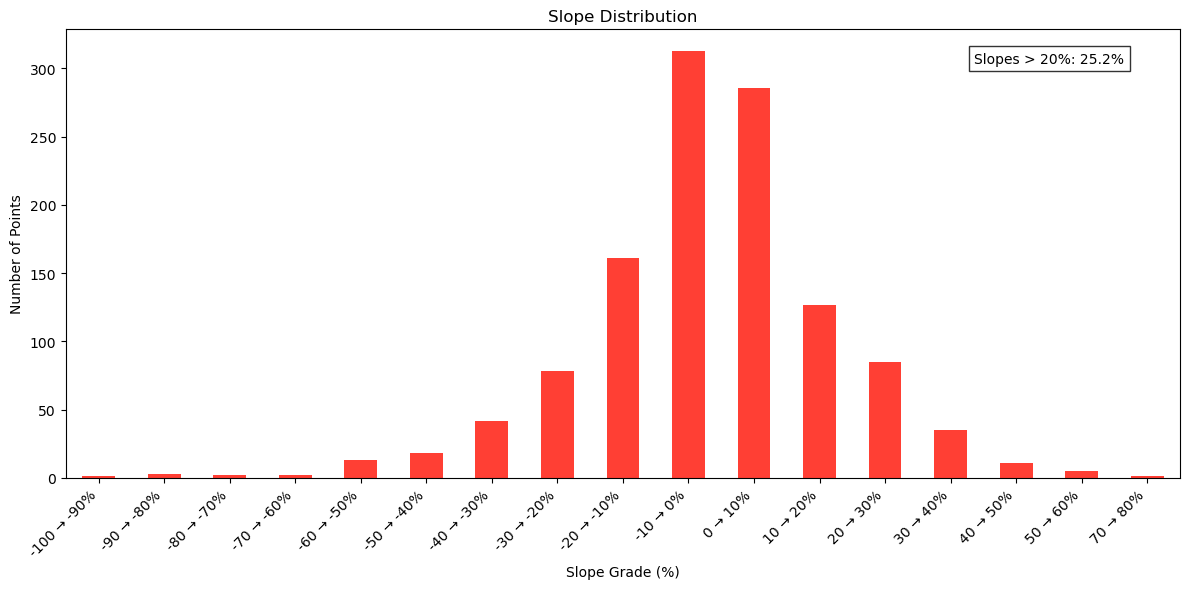

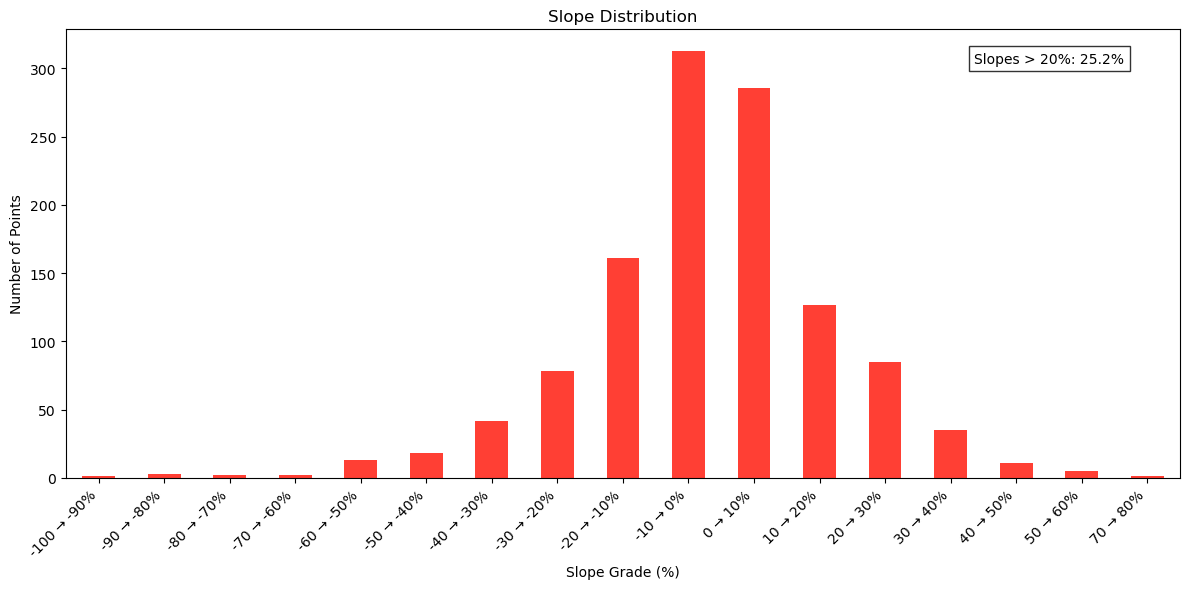

In [7]:
# Plot the slope histogram
slope_histogram = route.plot_slope_histogram()
slope_histogram

In [8]:
# Display the route's DataFrame
route.df

,latitude,longitude,elevation,elevation_diff,distance_between_points_3d,distance_between_points_2d,cum_distance_3d_km,cum_distance_2d_km,cum_elevation,slope_gradient,slope_bin,hard_slope
0,39.70951,2.62247,408.042969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 → 10%,False
1,39.70978,2.62241,405.945312,-2.097656,30.562507,30.490436,0.030563,0.030490,-2.097656,-0.068797,-10 → 0%,False
2,39.71025,2.62246,406.355469,0.410156,52.493415,52.491813,0.083056,0.082982,-1.687500,0.007814,0 → 10%,False
3,39.71026,2.62238,406.312500,-0.042969,6.938847,6.938714,0.089995,0.089921,-1.730469,-0.006193,-10 → 0%,False
4,39.71031,2.62238,406.742188,0.429688,5.577668,5.561092,0.095572,0.095482,-1.300781,0.077267,0 → 10%,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1178,39.79695,2.69612,2.054688,0.246094,77.415470,77.415079,26.499851,26.200360,-405.988281,0.003179,0 → 10%,False
1179,39.79724,2.69569,1.308594,-0.746094,48.941513,48.935826,26.548793,26.249295,-406.734375,-0.015246,-10 → 0%,False
1180,39.79740,2.69549,1.582031,0.273438,24.696836,24.695322,26.573490,26.273991,-406.460938,0.011072,0 → 10%,False
1181,39.79775,2.69498,1.773438,0.191406,58.486054,58.485741,26.631976,26.332477,-406.269531,0.003273,0 → 10%,False


# Compare routes

In [9]:
# Create a route group
group = RouteGroup()

# Add routes with custom labels
group.add_route(
    route=Route(os.path.join(GPX_FILE_PATH, 'wtr-campos-19-2024.gpx')),
    label='wtr-campos-19-2024'
)
group.add_route(
    route=Route(os.path.join(GPX_FILE_PATH, 'indomit-saobentosdosapucai-21-2024.gpx')),
    label='indomit-saobentosdosapucai-21-2024'
)

# Compare stats
compare_stats_df = group.compare_stats()
display(compare_stats_df)

# Plot elevation comparison
elevation_comparison = group.plot_elevation_comparison()
elevation_comparison

,Route,Distance (km),Elevation Gain (m),Elevation Loss (m),Avg Gain per km (m),Hard Slopes (%)
0,wtr-campos-19-2024,18.8,801,801,43,23.0
1,indomit-saobentosdosapucai-21-2024,21.6,1198,1098,55,25.1
